> Code to accompany **Chapter 3: DNN Fundamentals**

# Creating and Running a Simple Image Classifier

This Jupyter notebook provides the code for creating a simple Deep Neural Network image classifier using Keras. It is based on the tutorial provided here: https://www.tensorflow.org/tutorials/keras/basic_classification

Several other superb tutorials are also at: https://www.tensorflow.org/tutorials/keras


## Import Tensorflow and Keras

First import the required libraries - Tensorflow and tf.keras.

In [1]:
import tensorflow as tf
from tensorflow import keras

## Get the relevant data
There are two datasets provided within Keras: 

* __The training dataset__: for training the model

* __The test dataset__: for evaluating the model

Both datasets comprise a list of images with their corresponding labels. The labels are provided with the test data to evaluate how good the model is by testing it with each test image and checking whether the result matches the expected label.

It’s also handy to provide a list of classification names corresponding to the 10 possible clothing classifications. This will enable us to print the name of the classification rather than just its number (e.g. “T-shirt/top” rather than “0”) later on.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Normalise the data
Each image in the dataset comprises a list of pixels, each with a value depicting its intensity - 0-255. We need to normalise these for the input layer of the DNN so that they each lie between 0-1.


In [3]:
train_images = train_images/255.0
test_images = test_images/255.0

## Take a look at an example image

The images are monochrome and size 28 * 28 pixels.

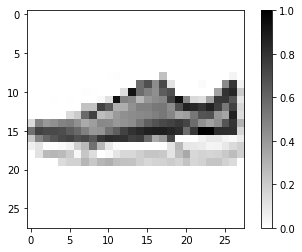

In [5]:
import matplotlib.pyplot as plt
plt.gca().grid(False)
plt.imshow(test_images[9], cmap=plt.cm.binary)
plt.colorbar()
plt.show()


## Define the DNN Model Architecture 

The Keras programming interface provides a simple way to create a model layer by layer with the appropriate neuron activation functions (in this case “ReLU” or “Softmax”). 

The code below illustrates how to create a model architecture as depicted in Chapter 3. The compile step also includes parameters to define the way that the model learns and how it judges its accuracy

In [6]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(56, activation='relu'),
                          keras.layers.Dense(56, activation='relu'),
                          keras.layers.Dense(10, activation='softmax', name='predictions_layer')
                         ])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Let's check the model.

The number of parameters is the sum of all the weights and all the biases for every layer.

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 56)                43960     
_________________________________________________________________
dense_1 (Dense)              (None, 56)                3192      
_________________________________________________________________
predictions_layer (Dense)    (None, 10)                570       
Total params: 47,722
Trainable params: 47,722
Non-trainable params: 0
_________________________________________________________________


## Train the model

Training the model requires optimising all the trainable parameters so they produce the best results across the training data. This is method is called "fit" because the model is adjusting to fit the training data.

In [8]:
model.fit(train_images, train_labels, epochs=6)

Epoch 1/6
60000/60000 [==============================] - 4s 66us/sample - loss: 0.5179 - acc: 0.8166
Epoch 2/6
60000/60000 [==============================] - 4s 58us/sample - loss: 0.3830 - acc: 0.8616
Epoch 3/6
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3452 - acc: 0.8739
Epoch 4/6
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3258 - acc: 0.8798
Epoch 5/6
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3087 - acc: 0.8863
Epoch 6/6
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2933 - acc: 0.8913


## Check how good the model is

The model can be evaluated using the test data set.

The model accuracy is slightly less on the test data than the training data (above) illustrating that the model has been tailored a little too much for the test data. This is called overfitting because the model fits the training data too accurately and has not generalised enough for other data. 

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Model accuracy based on test data:', test_acc)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.3623 - acc: 0.8704
Model accuracy based on test data: 0.8704


## Check the model for a specific image

First, print out the image and its associated (expected) label.

Expected label:  Coat


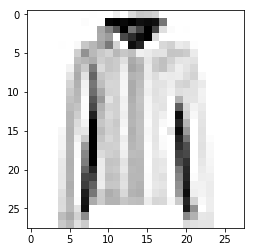

In [10]:
image_num = 6
print("Expected label: ", class_names[test_labels[image_num]])

plt.imshow(test_images[image_num], cmap=plt.cm.binary)


Now use the model to make the predictions. The final (softmax) layer provides probabilities for each of the possible clothing classes. Let's see what they are for the selected image.

In [11]:
predictions = model.predict(test_images)
print("Predictions for image:", predictions[image_num])

Predictions for image: [2.0931453e-04 2.5958019e-05 5.3381161e-03 9.3024952e-05 9.8870182e-01
 3.4905071e-08 5.4028798e-03 2.1192791e-10 2.2762216e-04 1.2793139e-06]


Obviously, all the probabilities should add up to one (the softmax layer ensures this), quick check...

In [12]:
total_probability = 0
for i in range(10):
    total_probability += predictions[image_num][i]
print(total_probability)

1.0000000503423947


The predictions fot the image are pretty difficult to understand. 
Here's the code to take the highest and convert it to an understandable label - the information that we are after.

In [13]:
import numpy as np
index_of_highest_prediction = np.argmax(predictions[image_num])

print("Classification: ", class_names[index_of_highest_prediction])
print("Confidence:     ", predictions[image_num][index_of_highest_prediction])


Classification:  Coat
Confidence:      0.9887018


## Take a look at the top 50 predictions for the test data

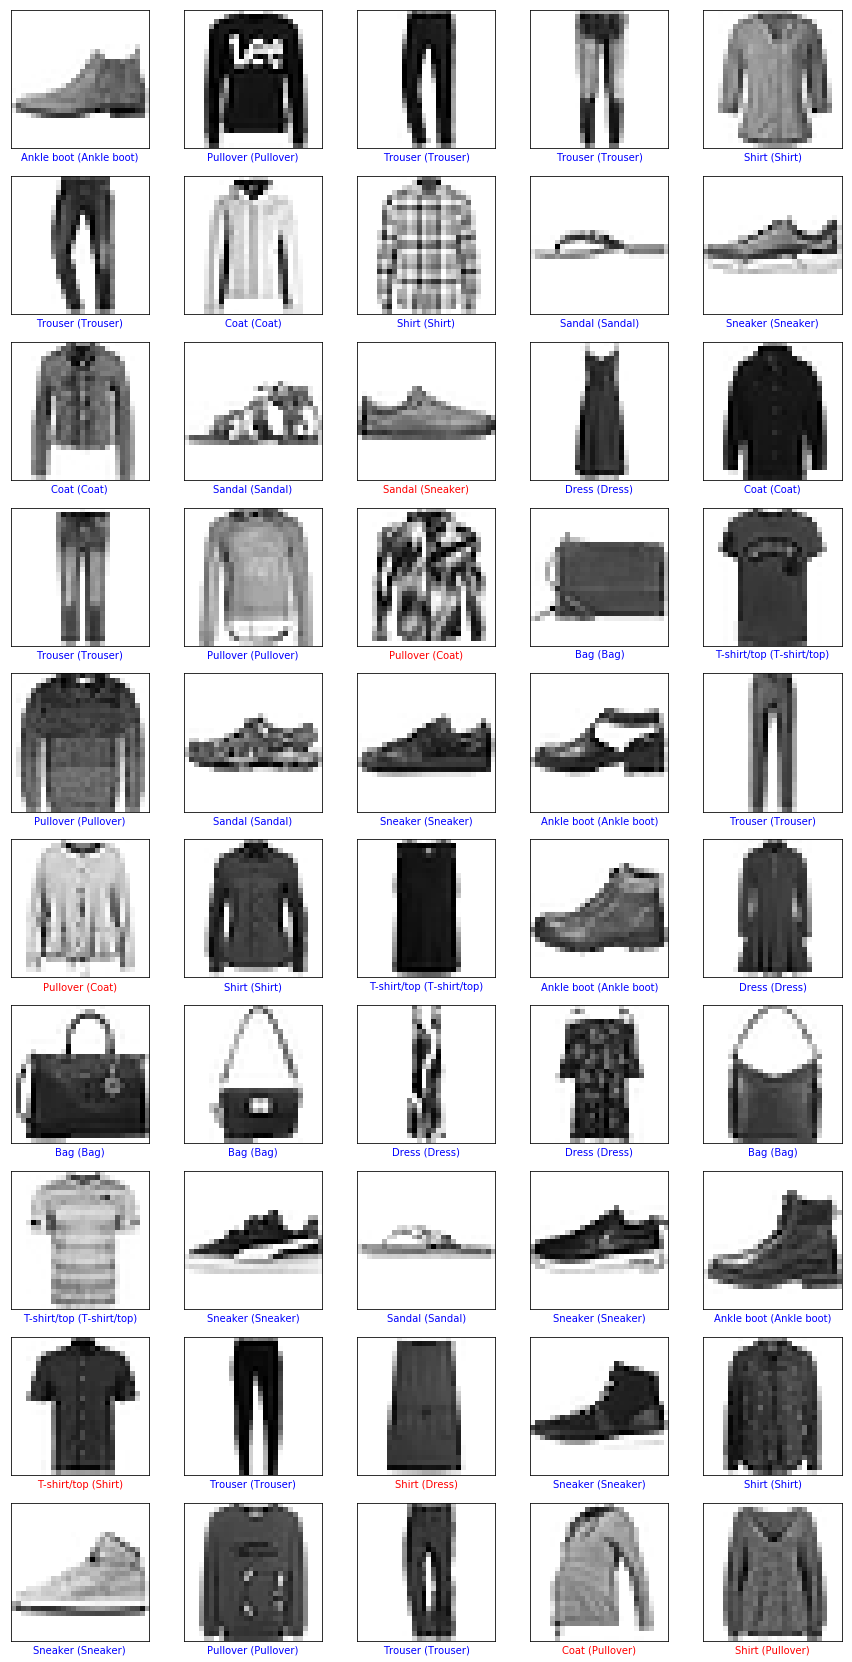

In [32]:
plt.figure(figsize=(15, 30))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    plt.xlabel(class_names[test_labels[i]])
    if predicted_label == test_labels[i]:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                class_names[test_labels[i]]),
                                color=color)   


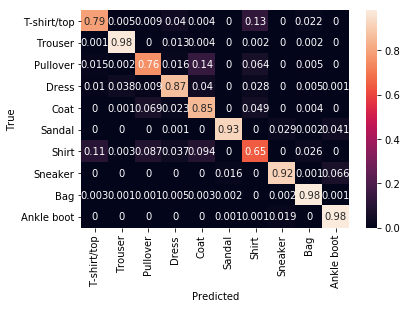

In [17]:
import seaborn as sns

def show_confusion_matrix(model, test_images, expected_labels, class_names):
    predictions = model.predict(test_images)
    num_predictions = predictions.shape[0]
    pred_labels = np.zeros((num_predictions), dtype=int)
    for pred, index in zip(predictions, range(num_predictions)):
        pred_labels[index] = np.argmax(pred)
        
    # Create a confusion matrix on training data.
    with tf.Graph().as_default():
        cm = tf.confusion_matrix(labels=expected_labels, predictions=pred_labels, num_classes=len(class_names))
        with tf.Session() as session:
            cm_out = session.run(cm)

    # Normalize the confusion matrix so that each row sums to 1.
    cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_out, annot=True, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    
show_confusion_matrix(model, test_images, test_labels, class_names)


This model is saved for future use in ```../models/fashion-MNIST.h5```. The model is saved in HDF5 format.

To re-use the model without needed to re-train, use:
```
keras.models.load_model("../models/fashion-MNIST.h5")
```

If you would like to save your own version of this model, use
```
model.save("<path_to_model>")
```

You can then re-load it with the appropriate ```model.load``` command.



In [16]:
#model.save("../models/fashion-MNIST.h5")
#keras.models.load_model("../models/fashion-MNIST.h5")